# **Capstone Project 3: Machine Learning**
# **California Housing Price**

# **Contents**
I.  Business Understanding </br>
II. Libraries & Dataset </br>
III. Explaratory Data Analysis </br>
IV. Machine Learning </br>
V. Extreme Gradient Boost</br>
VI. Conclusion and Recommendation</br>
VII. Business Recommendation
___

# **I. Business Understanding**

## **i. Background**

The California Housing Dataset provides a comprehensive view of the state's housing landscape as recorded in the 1990 census. While its primary purpose may not be to predict today's housing market, it serves as an invaluable resource for individuals entering the realm of machine learning. This dataset encompasses a variety of attributes, including geographical coordinates, housing details, demographic information, proximity to the ocean, and property values. It offers a holistic insight into the factors that significantly influenced the housing trends in California in 1990.


## **ii. Problem Statement**

In the vibrant real estate market of California, **accurately pricing newly constructed houses is a pivotal challenge**. The state's diverse neighborhoods and housing markets require careful consideration when determining property values. **Setting prices too high may lead to prolonged time on the market and deter potential buyers, while pricing properties too low could result in financial losses or prompt inquiries into the fairness of transactions**. California's complex housing market dynamics, influenced by regional diversity and buyer demographics, necessitate data-driven solutions.

## **iii. Goals**

In response to these challenges, **our goal as developers is to leverage machine learning to create predictive models that provide precise estimates of house prices**. By using comprehensive datasets without specifying individual features, we aim to provide a valuable resource for home sellers and buyers. **Our objective is to equip users with insights for making informed pricing decisions**, ensuring that houses are competitively priced and transactions are conducted transparently and efficiently in California's housing market.

## **iv. Analytic Approach**

We'll gather and preprocess California housing data, experiment with machine learning models, optimize performance, and deploy the best model for real-time house price predictions. Continuous improvements will ensure adaptability to market changes, addressing the challenge of precise pricing in California's dynamic housing market.

## **v. Metric Evaluation**

To determine the best model from the provided table, we need to assess several evaluation metrics:

1. **RMSE (Root Mean Square Error)**: This measures the discrepancy between the model's predictions and the actual values. A lower RMSE indicates a superior model.
2. **MAE (Mean Absolute Error)**: This evaluates the absolute difference between predictions and the actual observations. A model with a lower MAE is deemed better.
3. **MAPE (Mean Absolute Percentage Error)**: This gauges the relative difference between predictions and actual observations. The lower the MAPE, the better the model.

Let's compare each model based on these three evaluation metrics to pinpoint the top-performing one:

1. **Model with the Lowest RMSE**: A lower RMSE signifies a better model.
2. **Model with the Lowest MAE**: A lower MAE denotes a better model.
3. **Model with the Lowest MAPE**: A model with a lower MAPE is seen as superior.

Considering the above criteria, we'll identify the best model. These metrics suggest that the XGBoost Regressor is the model with the lowest RMSE, MAE, and MAPE. The second-best model is the RandomForest Regressor. Based on this, we'll select these two models as our benchmark models for predictions on the test set.


## **vi. Glossary**

| Feature             | Description                                                                                     |
|---------------------|-------------------------------------------------------------------------------------------------|
| longitude           | A measure of how far west a house is; a higher value is farther west                            |
| latitude            | A measure of how far north a house is; a higher value is farther north                          |
| housing_median_age  | Median age of a house within a block; a lower number is a newer building                        |
| total_rooms         | Total number of rooms within a block                                                            |
| total_bedrooms      | Total number of bedrooms within a block                                                         |
| population          | Total number of people residing within a block                                                  |
| households          | Total number of households, a group of people residing within a home unit, for a block         |
| median_income       | Median income for households within a block of houses (measured in tens of thousands of US Dollars) |
| ocean_proximity     | Location of the house with respect to the ocean/sea.                                           |
| median_house_value  | Median house value for households within a block (measured in US Dollars)                       |

___


# **II. Libraries and Dataset**

First, let's import our much needed libraries and Dataset

In [1]:
# EDA
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Schema
from sklearn.pipeline import make_pipeline, Pipeline
# from imblearn.pipeline import Pipeline

# Scalers
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor

# Encoding
import category_encoders as ce
# Missing value imputer
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Imbalance Sampling
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE

#F Scores
from sklearn.metrics import fbeta_score, make_scorer, r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# MODELS
# Linear
from sklearn.linear_model import LogisticRegression, Lasso, Ridge, LinearRegression
# DT
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
# Neighbour
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
# SVC
from sklearn.svm import SVC, SVR
# Ensemble
from sklearn.ensemble import VotingClassifier, StackingClassifier, RandomForestClassifier, GradientBoostingClassifier, VotingRegressor, StackingRegressor, RandomForestRegressor
from xgboost import XGBClassifier, XGBRegressor

# Train Test
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV, KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, mean_squared_error



import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data_california_house.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0


# **III. Explaratory Data Analysis**

## **i. Data Information**

**Getting Basic Information**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


**Missing Value Percentage of Each Column**

In [4]:
data.isna().sum()/len(data)*100

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        0.948228
population            0.000000
households            0.000000
median_income         0.000000
ocean_proximity       0.000000
median_house_value    0.000000
dtype: float64

**Detailed Information**

In [5]:
# Checking detailed info
listItem = []

for col in data.columns:
    listItem.append([col, data[col].dtype, data[col].isna().sum(), round((data[col].isna().sum()/len(data[col]))*100, 2),
                    data[col].nunique(), list(data[col].drop_duplicates().sample(2).values)]);

data_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
data_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,longitude,float64,0,0.00,806,"[-122.46, -121.92]"
1,latitude,float64,0,0.00,836,"[41.15, 36.11]"
2,housing_median_age,float64,0,0.00,52,"[46.0, 15.0]"
3,total_rooms,float64,0,0.00,5227,"[13703.0, 1502.0]"
4,total_bedrooms,float64,137,0.95,1748,"[911.0, 521.0]"
5,population,float64,0,0.00,3498,"[221.0, 1012.0]"
6,households,float64,0,0.00,1649,"[3405.0, 2492.0]"
7,median_income,float64,0,0.00,9797,"[5.7613, 1.4418]"
8,ocean_proximity,object,0,0.00,5,"[ISLAND, NEAR BAY]"
9,median_house_value,float64,0,0.00,3548,"[364400.0, 218200.0]"


**Checking Numerical Data for Outliers and Negative Values**

In [6]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14448.000000,14448.000000,14448.000000,14448.000000,14311.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,-119.566647,35.630093,28.618702,2640.132683,538.260709,1425.157323,499.508929,3.866667,206824.624516
std,2.006587,2.140121,12.596694,2191.612441,423.577544,1149.580157,383.098390,1.891158,115365.476182
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1451.000000,295.000000,784.000000,279.000000,2.570600,119600.000000
50%,-118.490000,34.260000,29.000000,2125.000000,435.000000,1165.000000,410.000000,3.539100,180000.000000
75%,-118.000000,37.710000,37.000000,3148.000000,647.000000,1724.000000,604.000000,4.736100,263900.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Based on describe, the jump from 75% to max took a huge leap **indicating we have outliers in our data**.

ocean_proximity column looks categorical, let's check that.

In [7]:
data.ocean_proximity.unique()

array(['INLAND', 'NEAR BAY', '<1H OCEAN', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

It is categorical, since it has 5 categories, we could use either One Hot Encoding or Binary Encoding. 

Personally i'll use **Binary Encoding**.

## **ii. Outlier Checking**

**Since we detect some outliers earlier in our data describe**, let's show outliers of each column.

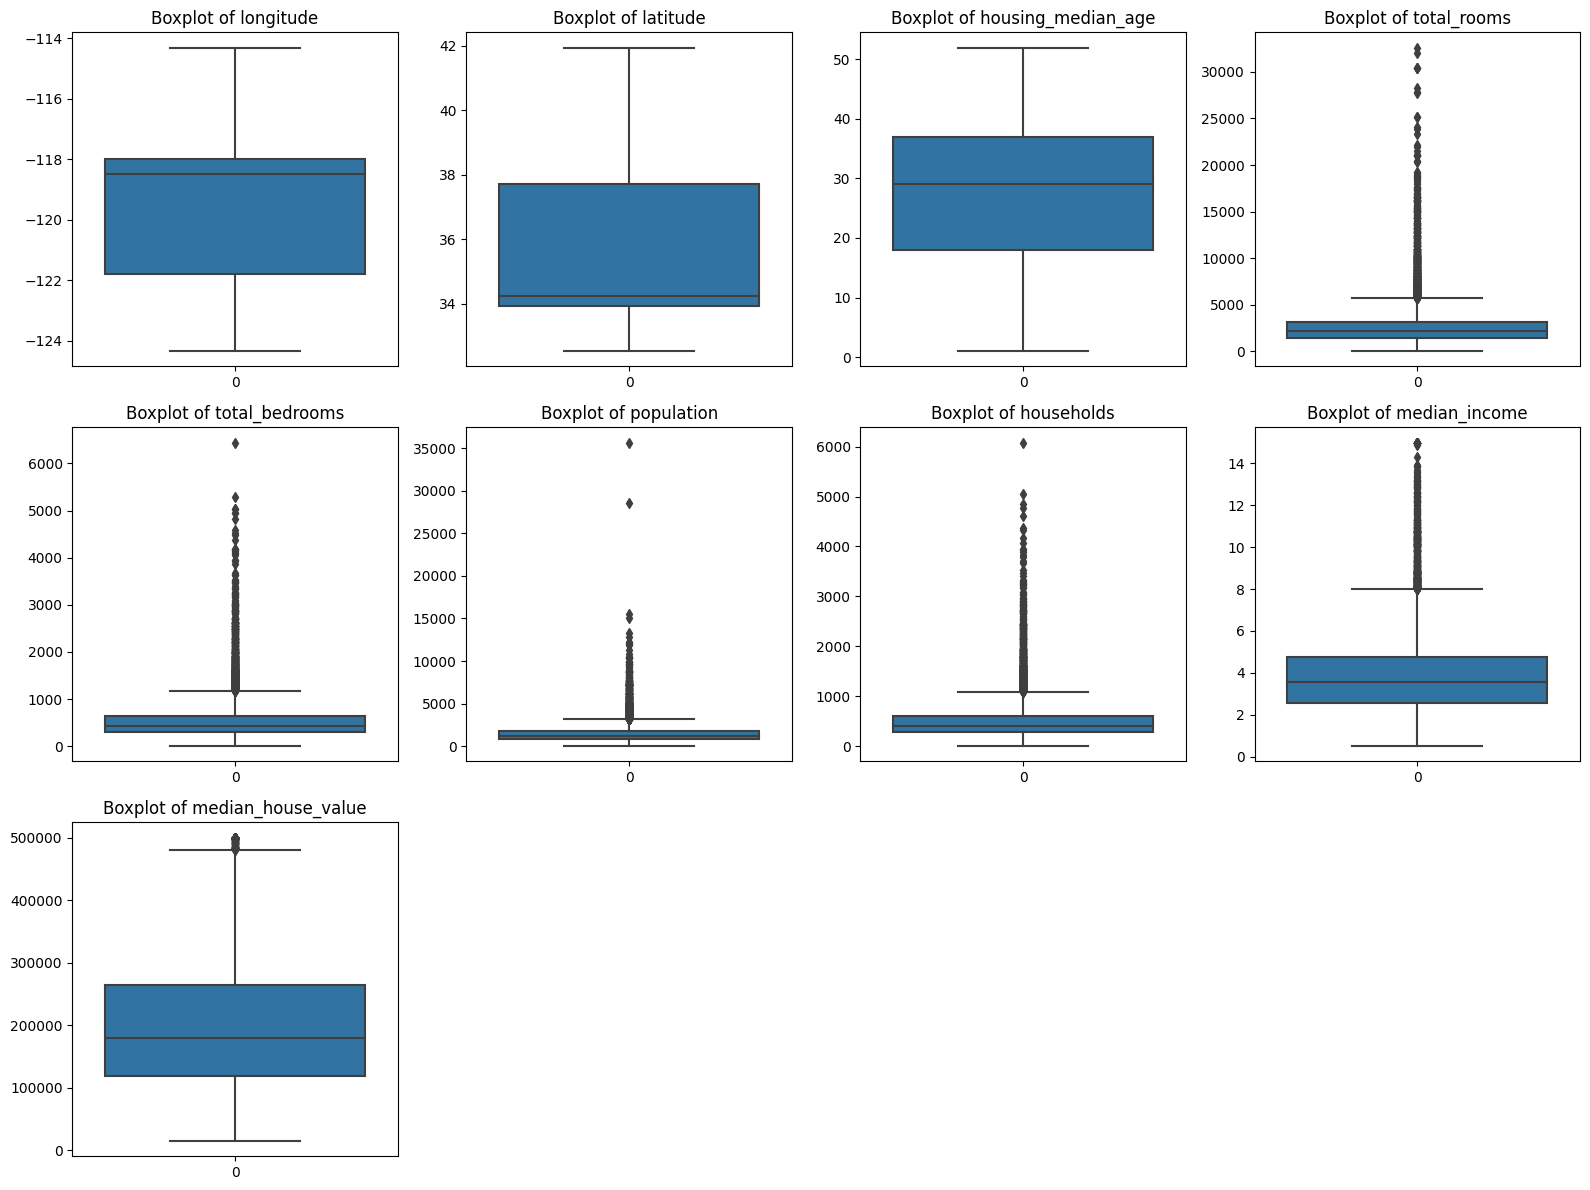

In [8]:
numeric_cols = data.select_dtypes(include=['number']).columns # Selecting numerical columns only
num_cols = len(numeric_cols) # Number of columns

# Define the number of columns and rows for subplots
num_cols_per_row = 4
num_rows = (num_cols - 1) // num_cols_per_row + 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols_per_row, figsize=(16, 4 * num_rows)) # 4 columns for each row
axes = axes.ravel()

for i, col in enumerate(numeric_cols):
    sns.boxplot(data=data[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

# Hide any empty subplots
for i in range(num_cols, num_rows * num_cols_per_row):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


From the chart, **there are some gaps between value range on each column**, total_rooms beyond **20k**, total_bedrooms **between 3k and 4k**, population near **10-15k**, households **between 3k and 4k**, lastly, median_income **beyond 14**. Based on that, we can **sort our data by mitigating each column**.

In [9]:
data = data[data['total_rooms']<20000]
data = data[data['total_bedrooms']<3800]
data = data[data['population']<11000]
data = data[data['households']<3500]
data = data[data['median_income']<14]

Dropping rows for house value takes a bit more consideration since it is our target column. Let's check how many are there.

In [10]:
data[data['median_house_value']>500000]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
8,-117.65,33.48,6.0,1638.0,188.0,572.0,174.0,13.0502,<1H OCEAN,500001.0
43,-122.21,37.37,34.0,1476.0,217.0,613.0,223.0,8.2883,NEAR OCEAN,500001.0
133,-122.44,37.80,52.0,3257.0,735.0,1045.0,620.0,4.5523,NEAR BAY,500001.0
201,-122.42,37.80,52.0,4079.0,1112.0,1466.0,1024.0,4.5913,NEAR BAY,500001.0
236,-121.89,37.46,5.0,1519.0,186.0,705.0,186.0,10.3798,<1H OCEAN,500001.0
...,...,...,...,...,...,...,...,...,...,...
14325,-118.44,34.07,26.0,3535.0,748.0,1322.0,666.0,7.1674,<1H OCEAN,500001.0
14328,-118.46,34.06,46.0,1302.0,215.0,482.0,226.0,7.0674,<1H OCEAN,500001.0
14371,-122.02,37.29,18.0,2550.0,312.0,999.0,320.0,8.7939,<1H OCEAN,500001.0
14377,-118.46,34.08,35.0,3247.0,525.0,1065.0,484.0,7.8426,<1H OCEAN,500001.0


Turns out there are 672 rows out of 14k. Since the numbers are on the **low side**, we can drop it now.

In [11]:
data = data[data['median_house_value']<500000]

## **iii. Data Distribution**
We want to see how our column relate to each other. Using pairplot to show scatterplot with columns as x and y with **Pearson as our base calculation**.

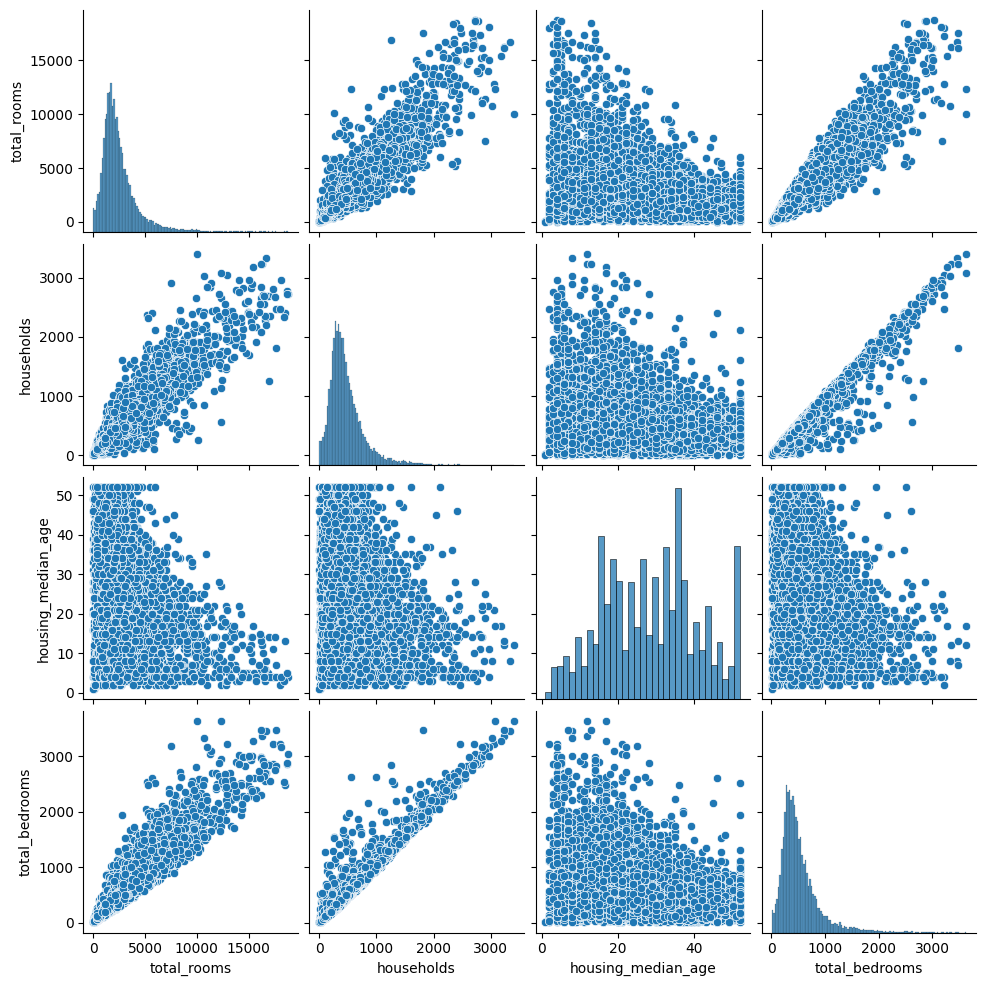

In [12]:
cols_bed = data[['total_rooms','households','housing_median_age','total_bedrooms']]
sns.pairplot(cols_bed)
plt.show()


In [13]:
import scipy.stats as ss
# Variable to be tested
corre = data['total_rooms'], data['households'], data['housing_median_age'], data['total_bedrooms']

# Normality test with Shapiro-Wilk
statistic, p_value = ss.shapiro(corre)

# Alpha value
alpha = 0.05

# Check the p-value against alpha
if p_value > alpha:
    print("Data follows a normal distribution (fail to reject H0)")
else:
    print("Data does not follow a normal distribution (reject H0)")


Data does not follow a normal distribution (reject H0)


As we can see, **some columns are related while others don't**. Related columns are showed with 'linear' like line. In the end, we can draw conclusion that our **data distribution is not normal**.

Since we have latitude and longitude column rather than district, we can visualize it to know where our data spreads more.

## **iv. Data Mapping**

In [14]:
import folium
from folium import plugins
from IPython.display import display

# Create a Folium Map object with an initial location
m = folium.Map(location=[data['latitude'].mean(), data['longitude'].mean()], zoom_start=10)

# Create a HeatMap object with latitude and longitude data
heat_data = [[row['latitude'], row['longitude']] for index, row in data.iterrows()]
plugins.HeatMap(heat_data).add_to(m)

# Display the map
display(m)


From the folium map, our data are mostly taken from **Los Angeles**.

## **v. Correlation Matrix**

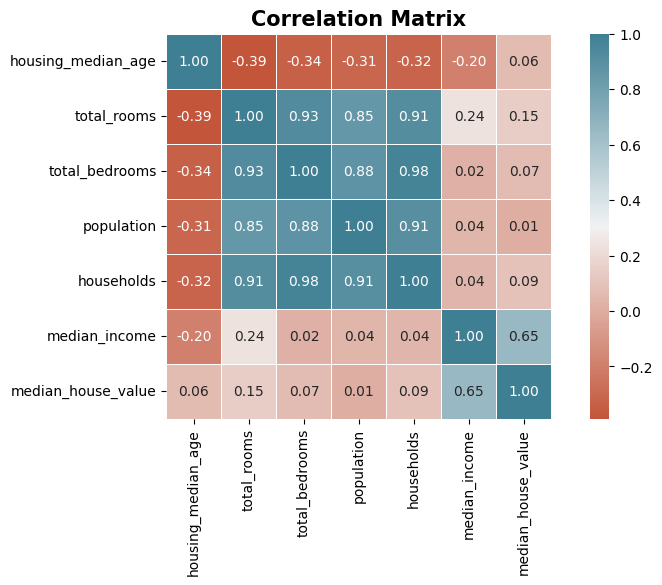

In [15]:
# Correlation matrix
plt.figure(figsize=(10, 5))
palette=sns.diverging_palette(20, 220, n=256)
corr = data.drop(['longitude', 'latitude', 'ocean_proximity'], axis=1).corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold');

From the matrix, we want to see our target (median_house_value) correlation with outher columns, with the conclusion that **our target correlate most with income**. While age does not correlate with other columns, total_rooms, total_bedrooms, population and households correlate with each other strongly.

## **vi. Recap**

- Data Distribution not normal
- Our data has outliers, which at the end we did outlier treatments by reading the boxplot and then dropping extreme outliers. Keep in mind, that this has subjectivity element.
- Our data are mostly from los angeles.
- Seeing correlation matrix, our target strongly correlates with income while age does not correlate with any column at all.

# **IV. Machine Learning**

## **i. Preparation**

Before delving into our machine learning phase, we must first go through a preparation process, which includes essential steps like preprocessing. During this stage, we will tackle encoding and model listing.

### **- Encoding**

Before diving into the details, it's important to understand that encoding serves as an intermediary step, helping us convert data into a format suitable for machine processing. Let's explore this process further.

In [16]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

Since our data has a few missing value and a few outliers left, we are to use Iterative to treat missing value alongside Robust Scaler, a scaler that are less affected by outliers.

In [17]:
iterative_impute_pipeline = Pipeline([
    ('iterative_imputer', IterativeImputer(max_iter=10, random_state=0)),
    ('scaler', RobustScaler())
])

transformer = ColumnTransformer([
    ('Binary', ce.BinaryEncoder(), ['ocean_proximity']),
    ('IterativeImputeAndScale', iterative_impute_pipeline, ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']),
], remainder='passthrough')

transformer


ColumnTransformer(remainder='passthrough',
                  transformers=[('Binary', BinaryEncoder(),
                                 ['ocean_proximity']),
                                ('IterativeImputeAndScale',
                                 Pipeline(steps=[('iterative_imputer',
                                                  IterativeImputer(random_state=0)),
                                                 ('scaler', RobustScaler())]),
                                 ['housing_median_age', 'total_rooms',
                                  'total_bedrooms', 'population', 'households',
                                  'median_income'])])

The cell above defines a data transformation pipeline to prepare the dataset for machine learning:

1. It uses IterativeImputer to **fill missing values in selected columns** and **scales the data** using RobustScaler.

2. A ColumnTransformer **combines these transformations with Binary encoding** for the 'ocean_proximity' column.

3. The 'remainder' parameter ensures that any remaining columns are **left untouched**.

In summary, **it's a pipeline for imputing missing values, scaling specific columns, and encoding categorical data.**

### **- Model Listing**

Listing Down 3 Base Models: Decision Tree, Linear and KNN.

Followed by 4 Ensemble Models: Voting, Stacking, Xtreme Gradient Boosting and Random Forest

**Since we have a few outliers on our target**, listing down log models version of each to see how good they are.

In [18]:
# Base Models
tree = DecisionTreeRegressor(max_depth=5, random_state=2023) 
lr = LinearRegression()
knn = KNeighborsRegressor(n_neighbors=5)

# Ensemble Models
xgb = XGBRegressor(random_state=2023)
rf = RandomForestRegressor(random_state=2023)
vr = VotingRegressor(estimators=[
    ('model1', tree),
    ('model2', knn),
    ('model3', lr),
    ('model4', xgb),
    ('model5', rf)
])
sr = StackingRegressor(estimators=[
    ('model1', tree),
    ('model2', knn),
    ('model3', lr)
], n_jobs=-1,final_estimator=SVR())

# Logarithmic Models
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(tree, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

## **ii. Splitting**

Here, we split between our features and our target. Since we only have a few columns, we can try to use all of them first.

In [19]:
x = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

xtrain,xtest,ytrain,ytest = train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=2023
)

## **iii. Pipeline & Benchmarking**

### **- Choosing Benchmark Model**

On this step, we will iterate all of our models using for loop through a pipeline. After going thru the pipeline, we will go into cross validation process to train our models better, each cross validation will have their own results which then we will see the average RMSE, MAE and MAPE score of our train models.

In [20]:
# Model List
models = [lr, knn, tree, vr, sr, rf, xgb, log_lr, log_knn, log_dt, log_rf, log_xgb]

#RMSE List
score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

# MAE List
score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

# MAPE List
score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Iterating all of our data models
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=2023) # Define Folds for cross validation

    # Our pipeline
    estimator = Pipeline([
        ('preprocessing', transformer),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        xtrain, 
        ytrain, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        xtrain, 
        ytrain, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        xtrain, 
        ytrain, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

# Filling our DataFrame with our models
train_mod = pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'Voting Regressor','Stacking Regressor',
              'RandomForest Regressor', 'XGBoost Regressor', 'Log LR', 'Log KNN', 'Log DT', 'Log RF', 'Log XGB'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

In [21]:
train_mod.sort_values(by='Mean_MAPE', ascending=False)

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
11,Log XGB,-45362.606707,1092.419816,-30101.579561,677.281384,-0.167653,0.003889
10,Log RF,-46282.289499,972.309750,-30656.358978,457.537931,-0.170115,0.001763
6,XGBoost Regressor,-45048.554056,1362.436156,-30666.655297,609.759486,-0.180386,0.004422
5,RandomForest Regressor,-46166.814510,1140.801446,-31360.713599,623.581076,-0.183949,0.003374
3,Voting Regressor,-47811.003399,770.144899,-33483.814903,436.570661,-0.197545,0.003124
8,Log KNN,-53827.702331,808.935311,-36589.621397,577.918494,-0.199955,0.003748
1,KNN Regressor,-53430.561521,803.804581,-36899.596560,573.412120,-0.209595,0.003639
7,Log LR,-62680.400717,1696.476192,-43484.598033,429.853046,-0.244911,0.003728
9,Log DT,-61467.569161,597.949501,-43711.065933,594.032901,-0.245061,0.002789
2,DecisionTree Regressor,-61594.428131,868.045123,-45105.449312,737.938873,-0.269864,0.006037


As we can see from the result table, XGBoost Regressor with its log counterpart produce the **lowest error** among all our trained models, followed by Random Forest Regressor with its log counterpart. 

Based from that, we will be taking these 2 models to predict our xtest in benchmarking process.

Note: Why are our result in negative values? The reason is to see which one from our result has the lowest score (**without changing this context**) by sorting them by bigger values.

### **- Benchmark Models**

In [22]:
# Define 2 Top Models from before
model = {'XGB': xgb,
         'RF': rf}

score_rmse = []
score_mae = []
score_mape = []


for i in model:
        bench_rf = Pipeline([
                ('preprocessing', transformer),
                ('model', model[i])
                ])

        bench_rf.fit(xtrain, ytrain)
        pred = bench_rf.predict(xtest)

        # Saving our metric scores
        score_rmse.append(np.sqrt(mean_squared_error(ytest, pred)))
        score_mae.append(mean_absolute_error(ytest, pred))
        score_mape.append(mean_absolute_percentage_error(ytest, pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=model.keys())
score_before_tuning

,RMSE,MAE,MAPE
XGB,44417.789595,29752.397631,0.176718
RF,45933.072048,30777.794264,0.186377


Benchmarking the models showed good result as they produced less error than training result. As XGB produced the best result compared to Random Forest, **we will continue using XGB from this point forward**. Unto the Hyper Parameter Tuning!

## **iv. Hyper Parameter Tuning**

In [23]:
# Hyperparameter Ranges for XGBoost with Explanations
space_xgb = {
    'model__max_depth': list(np.arange(1, 11)),  # Maximum depth of individual trees.
    'model__learning_rate': list(np.arange(1, 100)/100),  # Step size for optimization.
    'model__n_estimators': list(np.arange(100, 201)),  # Number of boosting rounds.
    'model__subsample': list(np.arange(2, 10)/10),  # Fraction of samples for each tree.
    'model__gamma': list(np.arange(1, 11)),  # Minimum reduction in loss for further partition.
    'model__colsample_bytree': list(np.arange(1, 10)/10),  # Fraction of features for each tree.
    'model__reg_alpha': list(np.logspace(-3, 1, 10)),  # L1 regularization term.
}


# defining pipeline
final_xgb = Pipeline([
        ('preprocessing', transformer),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    final_xgb, 
    param_distributions = space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Can only choose 1 metric for final optimisation
    random_state = 1  
)

I'm using random here instead of grid, because grid will took a long time to run.

Time to find out our best parameter!

In [24]:
random_xgb.fit(xtrain, ytrain)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('Binary',
                                                                               BinaryEncoder(),
                                                                               ['ocean_proximity']),
                                                                              ('IterativeImputeAndScale',
                                                                               Pipeline(steps=[('iterative_imputer',
                                                                                                IterativeImputer(random_state=0)),
                                                                                               ('scaler',
                                                                                                RobustScaler())]),
                                                                               ['housing_...
                                                             0.007742636826811269,
                                                             0.021544346900318832,
                                                             0.05994842503189409,
                                                             0.1668100537200059,
                                                             0.46415888336127775,
                                                             1.2915496650148828,
                                                             3.593813663804626,
                                                             10.0],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=1, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [25]:
random_xgb.best_estimator_.fit(xtrain,ytrain) # Getting our best model from random search
xgb_final_pred = random_xgb.predict(xtest)

model = {'XGB': XGBRegressor()}

# Saving our metric scores
rmse_xgb_tuning = np.sqrt(mean_squared_error(ytest, pred))
mae_xgb_tuning = mean_absolute_error(ytest, pred)
mape_xgb_tuning = mean_absolute_percentage_error(ytest, pred)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
XGB,45933.072048,30777.794264,0.186377


We did it! we optimized our MAPE values from 18% to 17.6%, let's see if logarithmic model supports our findings and get a better model.

In [26]:
random_xgb.best_params_  # Getting our parameters

{'model__subsample': 0.9,
 'model__reg_alpha': 0.05994842503189409,
 'model__n_estimators': 119,
 'model__max_depth': 8,
 'model__learning_rate': 0.05,
 'model__gamma': 5,
 'model__colsample_bytree': 0.8}

**Re-defining xgb variable with our best parameter**

In [27]:
xgb = XGBRegressor(subsample=0.9, reg_alpha= 0.05994842503189409,
 n_estimators= 119,
 max_depth= 8,
 learning_rate= 0.05,
 gamma= 5,
 colsample_bytree= 0.8)

log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

In [28]:
xgb_log_tuned = Pipeline([
        ('preprocessing', transformer),
        ('model', log_xgb)
        ])

xgb_log_tuned.fit(xtrain, ytrain)
pred = xgb_log_tuned.predict(xtest)
print(mean_absolute_percentage_error(ytest, pred))

0.21347478615029344


Turns out our logarithmic model does not lower our score but instead increase it. **Hence, we will use our base XGB model instead as the final model**.

## **v. Actual vs Prediction Gap**

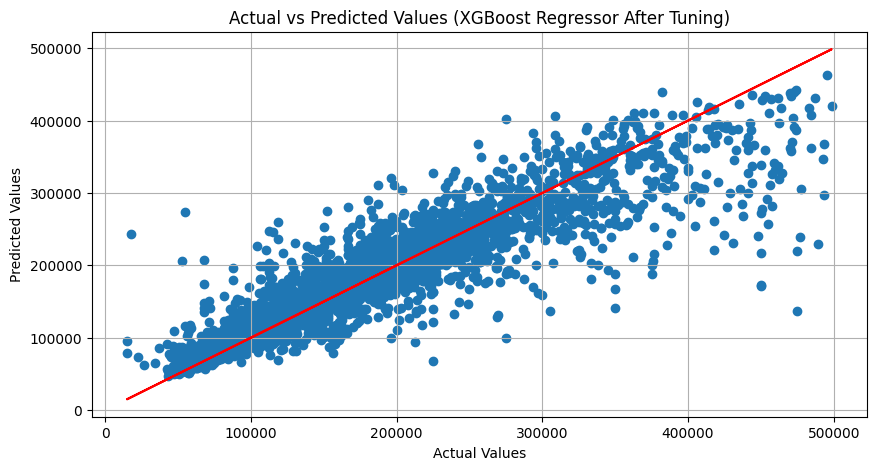

In [29]:
# Create a DataFrame to store actual and predicted values
actual_vs_predict_xgb = pd.DataFrame({'Actual': ytest, 'Predicted': xgb_final_pred})

# Plot the actual vs predict 
plt.figure(figsize=(10, 5))
plt.scatter(actual_vs_predict_xgb['Actual'], actual_vs_predict_xgb['Predicted'])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (XGBoost Regressor After Tuning)')
plt.plot(actual_vs_predict_xgb['Actual'], actual_vs_predict_xgb['Actual'], color='red')  # red line 
plt.grid(True)
plt.show()

The graph looks fantastic as we our prediction are close to actual values, but as house value goes higher, our prediction has less effectivity. This could be due to a lot of outliers in our data.

## **vi. Feature Importance**

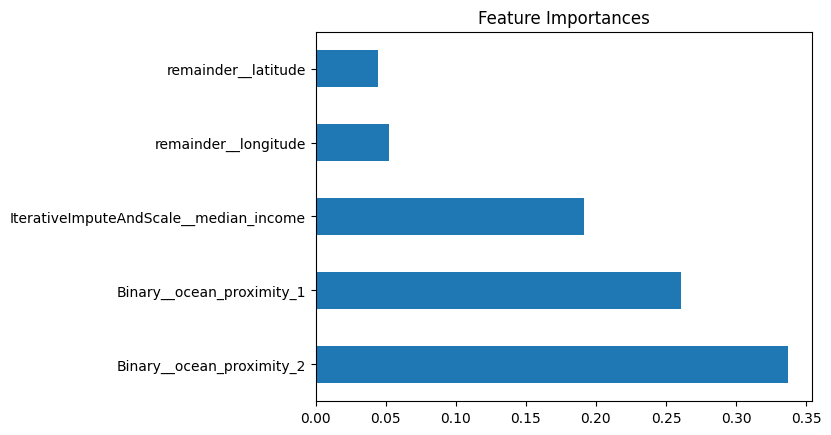

In [30]:
# Plot feature importances
feature_imp = pd.Series(final_xgb['model'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending = False).head()
feature_imp.plot(kind='barh', title='Feature Importances');

At the end these are top 5 feature importance to our model. Turns out income still does impact our result, with the most surprising fact that ocean proximity impacts our target too. lattitude and longitude in the future could be replaced with district names.

# **V. Extreme Gradient Boost**

Extreme Gradient Boosting (XGBoost) is a powerful and widely used machine learning algorithm, specifically designed for supervised learning tasks, particularly for regression and classification problems. It belongs to the family of gradient boosting algorithms, which are ensemble learning methods that combine the predictions of multiple weak models (typically decision trees) to create a stronger, more accurate predictive model.

Here are some key features and concepts related to XGBoost:

1. **Gradient Boosting**: XGBoost is a gradient boosting algorithm. It builds an ensemble of decision trees sequentially, where each new tree is trained to correct the errors made by the previous trees. This allows it to continually improve its predictions.

2. **Extreme Speed and Efficiency**: XGBoost is known for its computational efficiency and speed. It is optimized for performance and can handle large datasets efficiently. This efficiency is achieved through techniques like parallel processing and a customized tree construction algorithm.

3. **Regularization**: XGBoost includes L1 (Lasso) and L2 (Ridge) regularization terms in its objective function, which helps prevent overfitting. Regularization encourages simpler models and reduces the risk of fitting the noise in the data.

4. **Handling Missing Values**: XGBoost can handle missing data (missing values) gracefully. It automatically learns how to treat missing values during the training process, eliminating the need for imputation.

5. **Cross-validation**: Cross-validation is integrated into XGBoost, making it easy to perform hyperparameter tuning and model evaluation.

6. **Tree Pruning**: XGBoost applies a technique known as "tree pruning" during the construction of decision trees, which helps prevent overfitting and results in more interpretable models.


7. **Support for Diverse Objective Functions**: XGBoost is flexible and supports various objective functions, making it suitable for a wide range of tasks, including regression, classification, ranking, and more.

8. **Availability in Multiple Languages**: XGBoost is originally implemented in C++ but has interfaces for several programming languages, including Python, R, Java, and others, making it accessible to a broad community of data scientists and developers.

XGBoost has gained popularity in machine learning competitions (e.g., Kaggle) and real-world applications due to its high performance and versatility. It's an excellent choice when you need a robust and efficient model for predictive modeling tasks. However, it's essential to tune hyperparameters carefully and monitor for potential overfitting, as with any machine learning algorithm. 

You can learn more on: </br>[XGBoost Documentation](https://xgboost.readthedocs.io/en/stable/)

# **VI. C.L.R (Conclusion, Limitation and Recommendation)**

## **Conclusion**

Given that our primary concern is mispricing, we employed XGBoost with carefully tuned parameters. The outcome was a 17% MAPE, **signifying that our listed prices may deviate by up to 17% above or below the ideal prices we aim for**.

In our specific context, a 17% Mean Absolute Percentage Error (MAPE) is considered acceptable. This acceptability is based on guidance from [Lewis (1982)](https://www.semanticscholar.org/paper/Industrial-and-business-forecasting-methods%2C-Lewis%2C-Meade/0b84df3c9cd0aa0d12d822b833fe6365050eb10a) and takes into account the
unique factors of our forecasting problem. It's important to note that the acceptability of a MAPE value can vary widely depending on the industry, the quality of
the data, the specific application, and the expectations of stakeholders. **Therefore, for our particular situation, where guidance from Lewis is available, a 17%
MAPE aligns with the criteria for "reasonable forecasting".**

## **Limitation**

- Outdated Dataset = Outdated Model

Given that our dataset pertains to California House Pricing in 1990, it's important to acknowledge the substantial **time gap between 2023 and 1990**. Over the years, the value of real estate has typically seen considerable appreciation, with **house prices often increasing significantly as the economy grows and matures**. This temporal disparity should be taken into account when interpreting and applying the dataset to contemporary scenarios.
- District Names 

In this model, we incorporate latitude and longitude data, whereas current practices favor district names or postal codes. **To use this model effectively, additional reference data is required to map those names and codes to latitude and longitude coordinates which are not ideal practices**.

## **Recommendations**

- Outliers: Better data distribution for the next dataset, so that we can train our model better.
- Hyperparameter Optimization: Having more parameters and try every combination possible of XGBoost using Grid Search.

# **VII. Business Recommendation**

We cannot accurately predict the hypothetical effectiveness of mispricing reduction after implementing machine learning; instead, we need to conduct implementation testing and make comparisons between scenarios with and without machine learning. A few testing options include A/B testing, cross-validation, and real-world performance assessment. Ultimately, our core objective is to minimize the cost associated with mispricing.
___
The goal of implementing machine learning is not only focused on hypothetical mispricing calculations, but rather on exploring the hypothetical potential for reducing the overall cost associated with the processes that precede these critical aspects. By automating and streamlining various tasks and data analysis, machine learning helps optimize resource utilization and operational efficiency, ultimately driving cost savings across the board.

Based on [California Housing Prices on 1990](http://www.demographia.com/db-statehouse$2000.htm), averagin on 194.300.

Taken from [Market Connections](https://www.marketconnectionsinc.com/lets-talk-price-how-much-does-research-cost/)
___

In the old days, market researcher for real estate agent requires [3 to 6 months](https://www.quora.com/How-long-does-it-take-for-an-average-newbie-realtor-to-make-a-sale). Which means they spend a lot of time and equally spend a lot of money.

By using Machine Learning, this whole process could take 1 day easily if you have the data up to 1 month if you need to gather one.

Equation is:

Efficiency Saved (%) = [(Original Time - Reduced Time) / Original Time] * 100

- Original Time = 3 to 6 months (let's take the average, which is 4.5 months)
- Reduced Time = 1 day to 1 month (let's take the average, which is 15.5 days or approximately 0.5 months)

Efficiency Saved (%) = [(4.5 months - 0.5 months) / 4.5 months] * 100

Efficiency Saved (%) = (4 months / 4.5 months) * 100

Efficiency Saved (%) ≈ 88.89%
___

Let's say Real Estate Field is a big company, which means $100k market research team funding.

At the end, 88.89% x $100.000, we saved $88,890 which then can go into Machine Learning Building/AI Building.


 


___
**Save Model**

In [31]:
# # Save model
import pickle

# final_model = Pipeline([
#         ('preprocessing', transformer),
#         ('model', XGBRegressor(subsample=0.9, reg_alpha= 0.05994842503189409, n_estimators= 119,
#                 max_depth= 8,
#                 learning_rate= 0.05,
#                 gamma= 5,
#                 colsample_bytree= 0.8))])

# final_model.fit(xtrain, ytrain)

# pickle.dump(final_model, open('Model_California_Housing.sav', 'wb'))

In [32]:
# Load model
# filename = 'Model_California_Housing.sav'
# loaded_model = pickle.load(open(filename, 'rb'))

In [33]:
# np.sqrt(mean_squared_error(y_test, loaded_model.predict(X_test)))